#**Preliminares**

In [ ]:
!pip install git+https://github.com/aguirrejuan/innvestigate.git@updates_towards_tf2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/aguirrejuan/innvestigate.git (to revision updates_towards_tf2.0) to /tmp/pip-req-build-lhqtowz0
  Running command git clone --filter=blob:none --quiet https://github.com/aguirrejuan/innvestigate.git /tmp/pip-req-build-lhqtowz0
  Running command git checkout -b updates_towards_tf2.0 --track origin/updates_towards_tf2.0
  Switched to a new branch 'updates_towards_tf2.0'
  Branch 'updates_towards_tf2.0' set up to track remote branch 'updates_towards_tf2.0' from 'origin'.
  Resolved https://github.com/aguirrejuan/innvestigate.git to commit 0506b2920de4c3947c998439806e7fd8fa01bd12
  Preparing metadata (setup.py) ... done
  Created wheel for innvestigate: filename=innvestigate-2.0.0-py3-none-any.whl size=103612 sha256=6c3ef313a659b8e783d8ebf63ac4ce917ca02e3914ed890475e7e8fa4ade5476
  Stored in directory: /tmp/pip-ephem-wheel-cache-8i4zd7t1/wheels/aa/0e/b0/b84e21ae87

In [ ]:
!pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!git clone https://github.com/ealeongomez/Comparing-Regression-Models-with-enhanced-Interpretability-for-Wind-Speed-Forecasting-in-La-Guajira.git

Cloning into 'Comparing-Regression-Models-with-enhanced-Interpretability-for-Wind-Speed-Forecasting-in-La-Guajira'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 7 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 1.75 MiB | 5.46 MiB/s, done.


In [ ]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import innvestigate
from tabulate import tabulate

# Machine learning packages
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor

# Deep learning
import tensorflow as tf
from tensorflow import keras

# Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

In [ ]:
def SerieMatriz(timeSerie, predictionHorizonMax, window):
  timeSerie = np.squeeze(timeSerie)

  X = np.zeros([len(timeSerie)-predictionHorizonMax-window+1, window])
  y = np.zeros([len(timeSerie)-predictionHorizonMax-window+1, predictionHorizonMax])
  for i in range(X.shape[0]):
      X[i,:] = timeSerie[i:i+window]
      y[i,:] = timeSerie[i+window: i+window+predictionHorizonMax]

  return X, np.squeeze(y)

#**Variables**

In [ ]:
predictionHorizonMax = 10
window = 15
neurons = 100
batch_size = 4096
epochs = 300

#**Load data**

In [ ]:
df = pd.read_csv('/content/Comparing-Regression-Models-with-enhanced-Interpretability-for-Wind-Speed-Forecasting-in-La-Guajira/data/AeropuertoAlmirantePadilla.csv')
df.head()

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,15065180,AEROPUERTO ALM. PADILLA - [15065180],11.528444,-72.917722,15,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 05 - Magdalena-Cesar-Guajira-Sa...,La Guajira,Riohacha,...,NaN,VEL VIENTO,VVAG_CON,Velocidad del viento de las 24 horas,Horaria,2019-09-01 07:00,2.6,50,NaN,900
1,15065180,AEROPUERTO ALM. PADILLA - [15065180],11.528444,-72.917722,15,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 05 - Magdalena-Cesar-Guajira-Sa...,La Guajira,Riohacha,...,NaN,VEL VIENTO,VVAG_CON,Velocidad del viento de las 24 horas,Horaria,2019-09-01 08:00,2.9,50,NaN,900
2,15065180,AEROPUERTO ALM. PADILLA - [15065180],11.528444,-72.917722,15,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 05 - Magdalena-Cesar-Guajira-Sa...,La Guajira,Riohacha,...,NaN,VEL VIENTO,VVAG_CON,Velocidad del viento de las 24 horas,Horaria,2019-09-01 09:00,3.3,50,NaN,900
3,15065180,AEROPUERTO ALM. PADILLA - [15065180],11.528444,-72.917722,15,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 05 - Magdalena-Cesar-Guajira-Sa...,La Guajira,Riohacha,...,NaN,VEL VIENTO,VVAG_CON,Velocidad del viento de las 24 horas,Horaria,2019-09-01 10:00,3.3,50,NaN,900
4,15065180,AEROPUERTO ALM. PADILLA - [15065180],11.528444,-72.917722,15,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 05 - Magdalena-Cesar-Guajira-Sa...,La Guajira,Riohacha,...,NaN,VEL VIENTO,VVAG_CON,Velocidad del viento de las 24 horas,Horaria,2019-09-01 11:00,3.5,50,NaN,900


In [ ]:
df.columns

Index(['CodigoEstacion', 'NombreEstacion', 'Latitud', 'Longitud', 'Altitud',
       'Categoria', 'Entidad', 'AreaOperativa', 'Departamento', 'Municipio',
       'FechaInstalacion', 'FechaSuspension', 'IdParametro', 'Etiqueta',
       'DescripcionSerie', 'Frecuencia', 'Fecha', 'Valor', 'Grado',
       'Calificador', 'NivelAprobacion'],
      dtype='object')

In [ ]:
data = df['Valor']

data.index = df['Valor']
data.head()

Valor
2.6    2.6
2.9    2.9
3.3    3.3
3.3    3.3
3.5    3.5
Name: Valor, dtype: float64

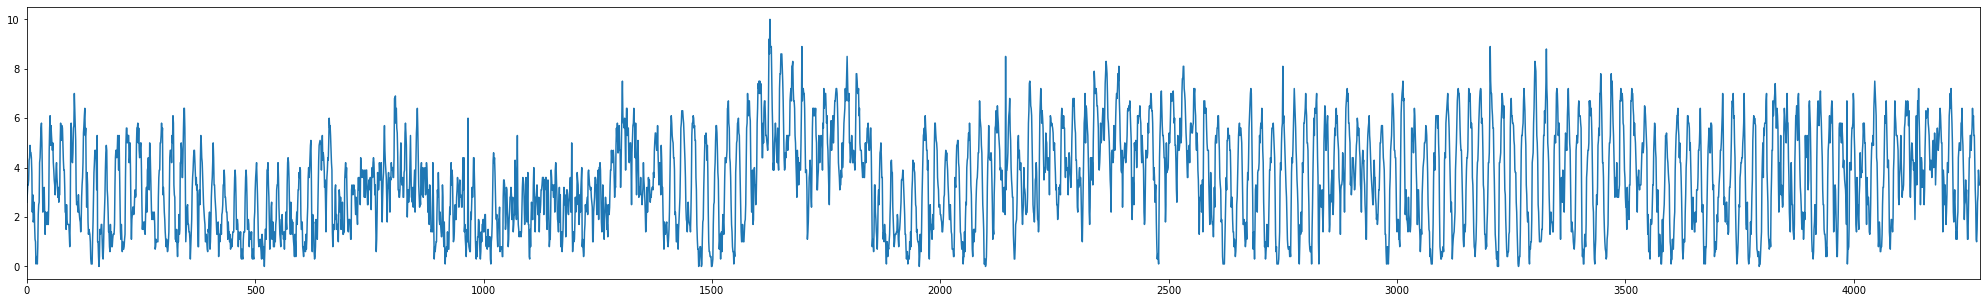

In [ ]:
timeSerie = data.values

plt.figure(figsize=(35,5))
plt.plot(timeSerie)
plt.xlim(0, len(timeSerie))
plt.show()

In [ ]:
X_input = np.array(timeSerie)
time = np.arange(0, len(X_input),1)

X_input.shape

(4276,)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
time = np.arange(0, len(timeSerie),1)
timeSerieNormalized = scaler.fit_transform(timeSerie.reshape(-1,1))

X, y = SerieMatriz(timeSerieNormalized, predictionHorizonMax, window)

#X.shape, y.shape

X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=0.20, random_state=42)

X.shape, y.shape, X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((4252, 15),
 (4252, 10),
 (2720, 15),
 (681, 15),
 (851, 15),
 (2720, 10),
 (681, 10),
 (851, 10))

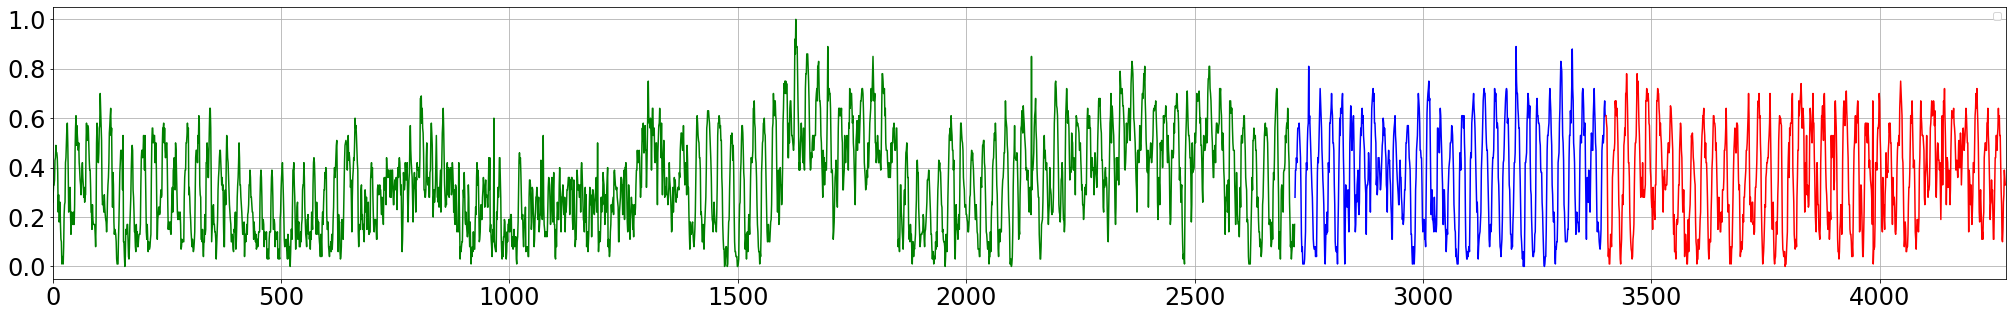

In [ ]:
# Ploter el conjunto de datos
plt.figure(figsize=(35,5))
plt.plot(time[0:X_train.shape[0]], timeSerieNormalized[0:X_train.shape[0]], 'g')
plt.plot(time[X_train.shape[0]:X_train.shape[0]+X_valid.shape[0]], timeSerieNormalized[X_train.shape[0]:X_train.shape[0]+X_valid.shape[0]], 'b')
plt.plot(time[X_train.shape[0]+X_valid.shape[0]:], timeSerieNormalized[X_train.shape[0]+X_valid.shape[0]:], 'r')
#plt.title('Dataset', c='r')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(0,timeSerie.shape[0])
plt.legend()
plt.grid(True)
plt.show()


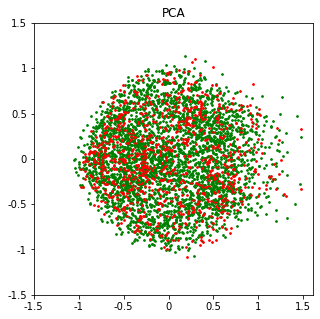

In [ ]:
# Analisis exploratorio de los datos
pca = PCA(n_components = 2)
tranformed_pca = pca.fit_transform(X)
tranformed_pca_train = pca.fit_transform(np.squeeze(X_))
tranformed_pca_test = pca.fit_transform(np.squeeze(X_test))

plt.figure(figsize=(5, 5))
plt.scatter(tranformed_pca_train[:,0], tranformed_pca_train[:,1], s=3, c='g', label='Trainig')
plt.scatter(tranformed_pca_test[:,0], tranformed_pca_test[:,1], s=3, c='r', label='Testing')
plt.xticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ['-1.5', '-1', '-0.5', '0', '0.5', '1', '1.5'])
plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ['-1.5', '-1', '-0.5', '0', '0.5', '1', '1.5'])
plt.title('PCA')
plt.show()


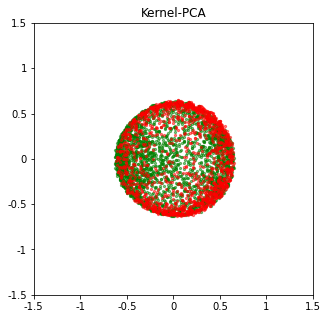

In [ ]:
list_kernel = [1]

labels = np.zeros(X.shape[0])
labels[X_train.shape[0]:] = 1


for value in list_kernel:

  scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=value)

  X_KernelPCA = scikit_kpca.fit_transform(X)

  plt.figure(figsize=(5, 5))
  plt.scatter(X_KernelPCA[labels==0, 0], X_KernelPCA[labels==0, 1], color='g', s=5, alpha=0.5, label='Train')
  plt.scatter(X_KernelPCA[labels==1, 0], X_KernelPCA[labels==1, 1], color='r', s=5, alpha=0.5, label='Test')
  plt.xticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ['-1.5', '-1', '-0.5', '0', '0.5', '1', '1.5'])
  plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ['-1.5', '-1', '-0.5', '0', '0.5', '1', '1.5'])
  plt.title('Kernel-PCA')
  plt.show()



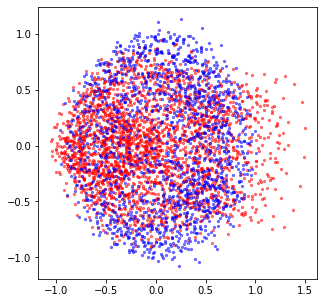

In [ ]:
# Analisis exploratorio de los datos
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(5, 5))
plt.scatter(X_pca[labels==0, 0], X_pca[labels==0, 1], color='r', s=5, alpha=0.5, label='Train')
plt.scatter(X_pca[labels==1, 0], X_pca[labels==1, 1], color='b', s=5, alpha=0.5, label='Test')


#**Machine Learning**

In [ ]:
# Features models proofs
models = [
            [('scaler', StandardScaler()),
             ('reg',  KernelRidge(kernel = 'rbf'))
            ],
            [('scaler', StandardScaler()),
             ('rep', PCA()),
             ('reg', KNeighborsRegressor())]
        ]

model_names = ['KR','KNN']

# Search parameters
parameters =[{'reg__gamma':[1e-3,1e-2,1e-1,1,10,100],
              'reg__alpha':[1e-3,1e-2,1e-1,1,10,100]
              },
             {'reg__n_neighbors': [1,3,5],
              'rep__n_components':[0.5,0.75,0.9]}
             ]

In [ ]:
mse = np.zeros((predictionHorizonMax, len(models)))
best_estimators = predictionHorizonMax*[None]
best_hyperparameters = predictionHorizonMax*[None]
results_ml = {'KR': {}, 'KNN': {}}

for i in range(predictionHorizonMax):
  y_values = y_[:,i]

  list_est = []
  list_hyperparameters = []

  for j in range(len(models)):

    print("Prediction horizon {PredictionHorizon} of {Smodel}".format(PredictionHorizon=i+1,Smodel=model_names[j]))

    # Seleccion de modelo y parámetros
    method = models[j]
    parameter = parameters[j]
    grid_search = GridSearchCV(Pipeline(method), parameter, cv=10, verbose=5, n_jobs=-1, scoring='neg_mean_absolute_error')

    # Generate model
    grid_search.fit(X_, y_values)

    # Estimar salida conjunto de valid
    y_pred = grid_search.best_estimator_.predict(X_test)
    results_ml[str(model_names[j])].update({'{}'.format(i+1): y_pred})


Prediction horizon 1 of KR
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Prediction horizon 1 of KNN
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Prediction horizon 2 of KR
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Prediction horizon 2 of KNN
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Prediction horizon 3 of KR
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Prediction horizon 3 of KNN
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Prediction horizon 4 of KR
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Prediction horizon 4 of KNN
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Prediction horizon 5 of KR
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Prediction horizon 5 of KNN
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Prediction horizon 6 of KR
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Prediction hori

Kernel Ridge

In [ ]:
col_names, MSE, RMSE, MAE, R2 = ['Metrics'], ["MSE"], ["RMSE"], ["MAE"], ["R2"]

for k in range(predictionHorizonMax):
  col_names.append(str(k+1))
  MSE.append(round(mean_squared_error(y_test[:,k], results_ml['KR'][str(k+1)], squared=False), 2))
  RMSE.append(round(mean_squared_error(y_test[:,k], results_ml['KR'][str(k+1)], squared=True), 2))
  MAE.append(round(mean_absolute_error(y_test[:,k], results_ml['KR'][str(k+1)]), 2))
  R2.append(round(r2_score(y_test[:,k], results_ml['KR'][str(k+1)]), 2))

data = [MSE, RMSE, MAE, R2]

print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│ Metrics   │    1 │    2 │    3 │    4 │    5 │    6 │    7 │    8 │    9 │   10 │
╞═══════════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╡
│ MSE       │ 0.07 │ 0.11 │ 0.12 │ 0.13 │ 0.13 │ 0.14 │ 0.14 │ 0.14 │ 0.13 │ 0.12 │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ RMSE      │ 0.01 │ 0.01 │ 0.01 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.01 │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ MAE       │ 0.06 │ 0.08 │ 0.09 │ 0.1  │ 0.1  │ 0.11 │ 0.11 │ 0.11 │ 0.11 │ 0.1  │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ R2        │ 0.85 │ 0.7  │ 0.61 │ 0.55 │ 0.52 │ 0.48 │ 0.47 │ 0.5  │ 0.52 │ 0.6  │
╘═══════════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╛


KNN

In [ ]:
col_names, MSE, RMSE, MAE, R2 = ['Metrics'], ["MSE"], ["RMSE"], ["MAE"], ["R2"]

for k in range(predictionHorizonMax):
  col_names.append(str(k+1))
  MSE.append(round(mean_squared_error(y_test[:,k], results_ml['KNN'][str(k+1)], squared=False), 2))
  RMSE.append(round(mean_squared_error(y_test[:,k], results_ml['KNN'][str(k+1)], squared=True), 2))
  MAE.append(round(mean_absolute_error(y_test[:,k], results_ml['KNN'][str(k+1)]), 2))
  R2.append(round(r2_score(y_test[:,k], results_ml['KNN'][str(k+1)]), 2))

data = [MSE, RMSE, MAE, R2]

print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│ Metrics   │    1 │    2 │    3 │    4 │    5 │    6 │    7 │    8 │    9 │   10 │
╞═══════════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╡
│ MSE       │ 0.1  │ 0.12 │ 0.13 │ 0.14 │ 0.14 │ 0.14 │ 0.15 │ 0.14 │ 0.14 │ 0.13 │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ RMSE      │ 0.01 │ 0.01 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ MAE       │ 0.07 │ 0.09 │ 0.1  │ 0.11 │ 0.11 │ 0.11 │ 0.11 │ 0.11 │ 0.11 │ 0.1  │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ R2        │ 0.74 │ 0.6  │ 0.53 │ 0.48 │ 0.46 │ 0.42 │ 0.4  │ 0.44 │ 0.48 │ 0.55 │
╘═══════════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╛


#**Deep Learning**

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((2720, 15, 1), (681, 15, 1), (851, 15, 1), (2720, 10), (681, 10), (851, 10))

#**RNN simple**

In [ ]:
input = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]), name='Input')
rnn_1 = tf.keras.layers.SimpleRNN(neurons, activation='relu', return_sequences=True, name='h1')(input)
rnn_2 = tf.keras.layers.SimpleRNN(neurons, activation='relu', return_sequences=True, name='h2')(rnn_1)
rnn_3 = tf.keras.layers.SimpleRNN(neurons, activation='relu', return_sequences=True, name='h3')(rnn_2)
rnn_4 = tf.keras.layers.SimpleRNN(neurons, activation='relu', return_sequences=True, name='h4')(rnn_3)
rnn_5 = tf.keras.layers.SimpleRNN(neurons, activation='relu', return_sequences=True, name='h5')(rnn_4)
output = keras.layers.SimpleRNN(predictionHorizonMax)(rnn_5)

# Create model
model_RNNSimple = tf.keras.Model(inputs=input, outputs=output)

In [ ]:
model_RNNSimple.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['mae'])
history_RNNSimple = model_RNNSimple.fit(X_train, y_train, epochs=500, batch_size=batch_size, validation_data=(X_valid, y_valid), verbose=0)


In [ ]:
forecasting_RNNSimple = model_RNNSimple.predict(X_test)

27/27 [==============================] - 1s 10ms/step


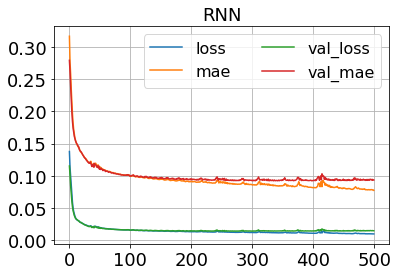

In [ ]:
hpd = pd.DataFrame(history_RNNSimple.history)

hpd.plot()
plt.grid(True)
plt.legend(ncols=2, prop={'size': 16})
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title('RNN', fontsize=18)
plt.show()

In [ ]:
col_names, MSE, RMSE, MAE, R2 = ['Metrics'], ["MSE"], ["RMSE"], ["MAE"], ["R2"]

for k in range(predictionHorizonMax):
  col_names.append(str(k+1))
  MSE.append(round(mean_squared_error(y_test[:,k], forecasting_RNNSimple[:,k], squared=False), 2))
  RMSE.append(round(mean_squared_error(y_test[:,k], forecasting_RNNSimple[:,k], squared=True), 2))
  MAE.append(round(mean_absolute_error(y_test[:,k], forecasting_RNNSimple[:,k]), 2))
  R2.append(round(r2_score(y_test[:,k], forecasting_RNNSimple[:,k]), 2))

data = [MSE, RMSE, MAE, R2]

print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│ Metrics   │    1 │    2 │    3 │    4 │    5 │    6 │    7 │    8 │    9 │   10 │
╞═══════════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╡
│ MSE       │ 0.08 │ 0.11 │ 0.12 │ 0.13 │ 0.14 │ 0.14 │ 0.14 │ 0.14 │ 0.14 │ 0.12 │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ RMSE      │ 0.01 │ 0.01 │ 0.01 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ MAE       │ 0.06 │ 0.08 │ 0.1  │ 0.1  │ 0.11 │ 0.11 │ 0.11 │ 0.11 │ 0.11 │ 0.1  │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ R2        │ 0.81 │ 0.68 │ 0.6  │ 0.53 │ 0.5  │ 0.47 │ 0.44 │ 0.5  │ 0.5  │ 0.59 │
╘═══════════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╛


In [ ]:
analyzer = innvestigate.create_analyzer('lrp.z', model_RNNSimple)
relevance = list(analyzer.analyze(X_test).values())[0]

In [ ]:
index = 100
y_test[index], np.squeeze(relevance.sum(axis=1))[index]

(array([0.19, 0.28, 0.36, 0.33, 0.25, 0.5 , 0.47, 0.49, 0.51, 0.47]),
 -0.13312815)

In [ ]:
y_test == np.squeeze(relevance.sum(axis=1))

<ipython-input-24-a5bfed84bb99>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  y_test == np.squeeze(relevance.sum(axis=1))


False

1/1 [==============================] - 0s 28ms/step


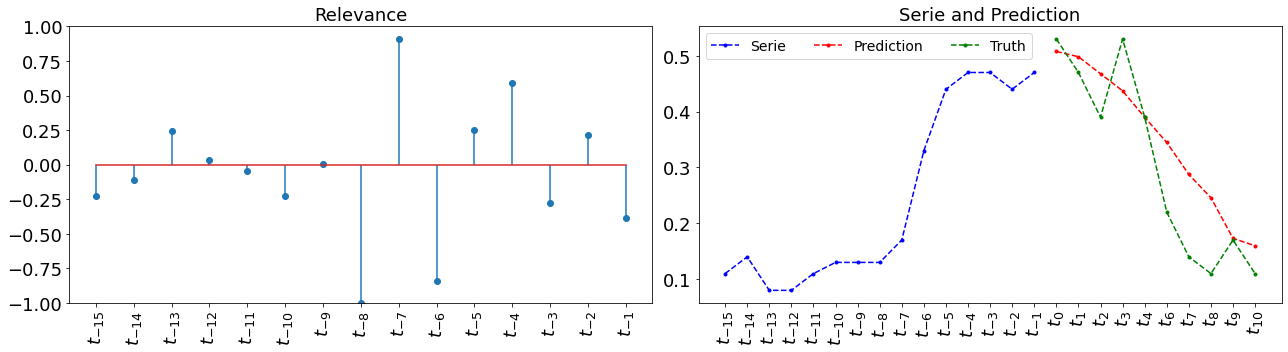

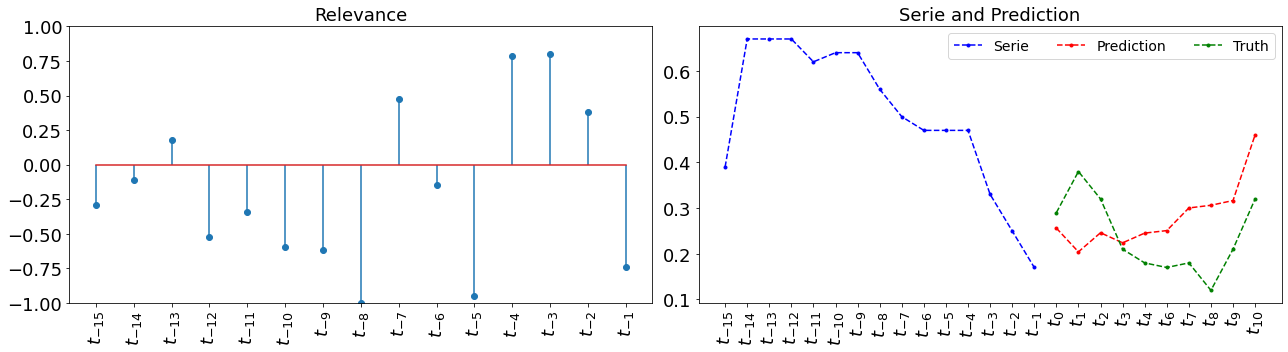

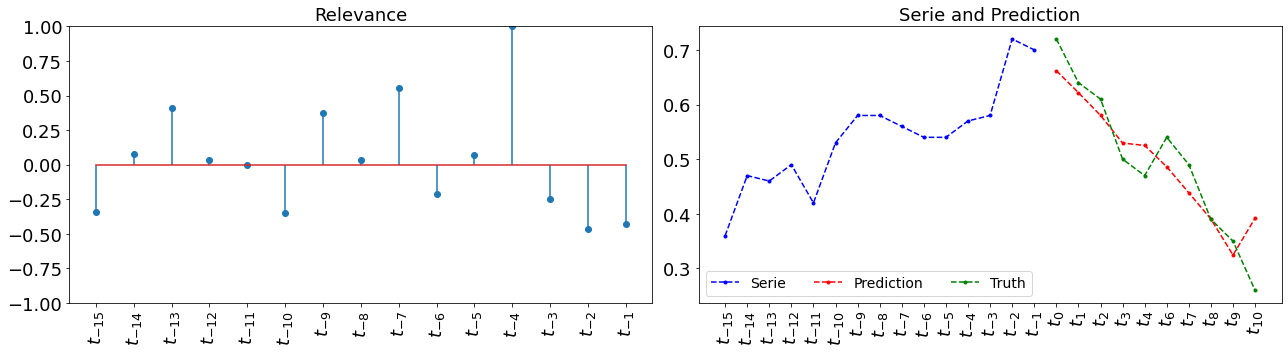

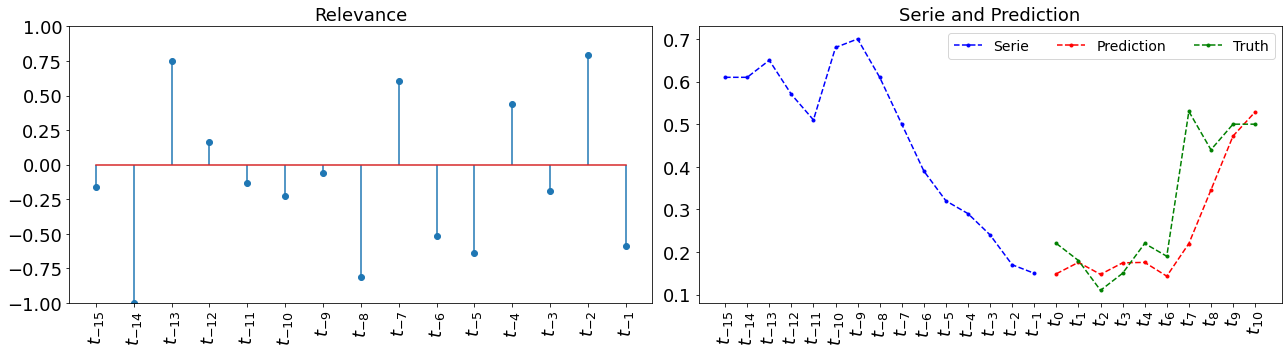

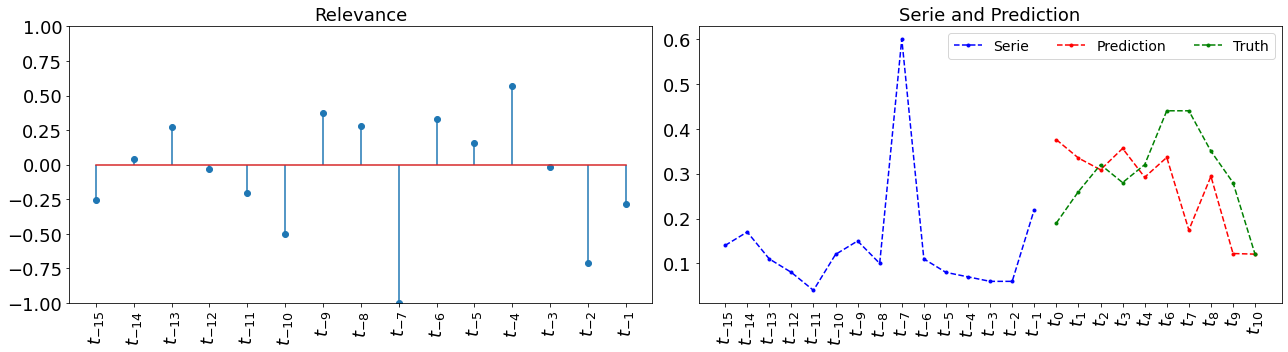

In [ ]:
flag = predictionHorizonMax
x_t = [f'$t_{{{flag-t+1}}}$' if t <= 5 else f'$t_{{{(t-flag)*-1}}}$' for t in range(predictionHorizonMax+window,0,-1)]
time = np.arange(0, predictionHorizonMax+window, 1)

for i,(rel, x_signal, y_t) in enumerate(zip(relevance[15:20], X_test, y_test)):

  prediction = model_RNNSimple.predict(x_signal[None,...])
  norm = -0.5 +  rel/np.max(np.abs(rel)) + 0.5

  plt.figure(figsize=(18,5))
  norm = -0.5 +  rel/np.max(np.abs(rel)) + 0.5
  plt.subplot(1,2,1)
  plt.title('Relevance', fontsize=18)
  plt.stem(norm)
  plt.ylim([-1,1])
  plt.xticks(list(time[0:window]), x_t[0:window], rotation=90, fontsize=18)
  plt.yticks(fontsize=18)

  plt.subplot(1,2,2)
  plt.title('Serie and Prediction', fontsize=18)
  plt.plot(time[0:window], x_signal, '--.b')
  plt.plot(time[window:], np.transpose(prediction), '--.r')
  plt.xticks(list(time), x_t, rotation=90, fontsize=18)
  plt.yticks(fontsize=18)
  plt.plot(time[window:], y_t, '--.g')
  plt.legend(['Serie','Prediction','Truth'], ncol=3, prop={'size': 14})

  plt.tight_layout()


#**GRU**

In [ ]:
input = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]), name='Input')
gru_1 = tf.keras.layers.GRU(neurons, activation='relu', return_sequences=True, name='h1')(input)
gru_2 = tf.keras.layers.GRU(neurons, activation='relu', return_sequences=True, name='h2')(gru_1)
gru_3 = tf.keras.layers.GRU(neurons, activation='relu', return_sequences=True, name='h3')(gru_2)
gru_4 = tf.keras.layers.GRU(neurons, activation='relu', return_sequences=True, name='h4')(gru_3)
gru_5 = tf.keras.layers.GRU(neurons, activation='relu', return_sequences=True, name='h5')(gru_4)
gru_6 = tf.keras.layers.GRU(neurons, activation='relu', return_sequences=True, name='h6')(gru_5)
output = keras.layers.GRU(predictionHorizonMax)(gru_6)

# Create model
model_GRU = tf.keras.Model(inputs=input, outputs=output)


In [ ]:
model_GRU.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['mae'])
history_GRU = model_GRU.fit(X_train, y_train, epochs=600, batch_size=batch_size, validation_data=(X_valid, y_valid), verbose=0)


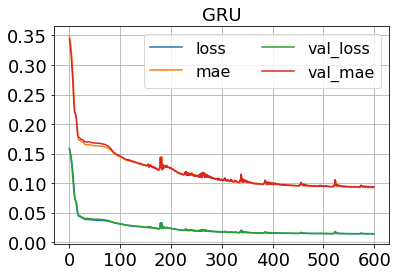

In [ ]:
hpd = pd.DataFrame(history_GRU.history)

hpd.plot()
plt.grid(True)
plt.legend(ncols=2, prop={'size': 16})
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title('GRU', fontsize=18)
plt.show()

In [ ]:
forecasting_GRU = model_GRU.predict(X_test)

27/27 [==============================] - 2s 29ms/step


In [ ]:
col_names, MSE, RMSE, MAE, R2 = ['Metrics'], ["MSE"], ["RMSE"], ["MAE"], ["R2"]

for k in range(predictionHorizonMax):
  col_names.append(str(k+1))
  MSE.append(round(mean_squared_error(y_test[:,k], forecasting_GRU[:,k], squared=False), 2))
  RMSE.append(round(mean_squared_error(y_test[:,k], forecasting_GRU[:,k], squared=True), 2))
  MAE.append(round(mean_absolute_error(y_test[:,k], forecasting_GRU[:,k]), 2))
  R2.append(round(r2_score(y_test[:,k], forecasting_GRU[:,k]), 2))

data = [MSE, RMSE, MAE, R2]

print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│ Metrics   │    1 │    2 │    3 │    4 │    5 │    6 │    7 │    8 │    9 │   10 │
╞═══════════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╡
│ MSE       │ 0.08 │ 0.11 │ 0.12 │ 0.13 │ 0.13 │ 0.14 │ 0.13 │ 0.13 │ 0.13 │ 0.12 │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ RMSE      │ 0.01 │ 0.01 │ 0.01 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.01 │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ MAE       │ 0.06 │ 0.08 │ 0.09 │ 0.1  │ 0.11 │ 0.11 │ 0.11 │ 0.11 │ 0.1  │ 0.1  │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ R2        │ 0.84 │ 0.7  │ 0.6  │ 0.54 │ 0.51 │ 0.47 │ 0.49 │ 0.52 │ 0.54 │ 0.61 │
╘═══════════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╛


In [ ]:
analyzer = innvestigate.create_analyzer('lrp.z', model_GRU)
relevance = list(analyzer.analyze(X_test).values())[0]

1/1 [==============================] - 0s 35ms/step


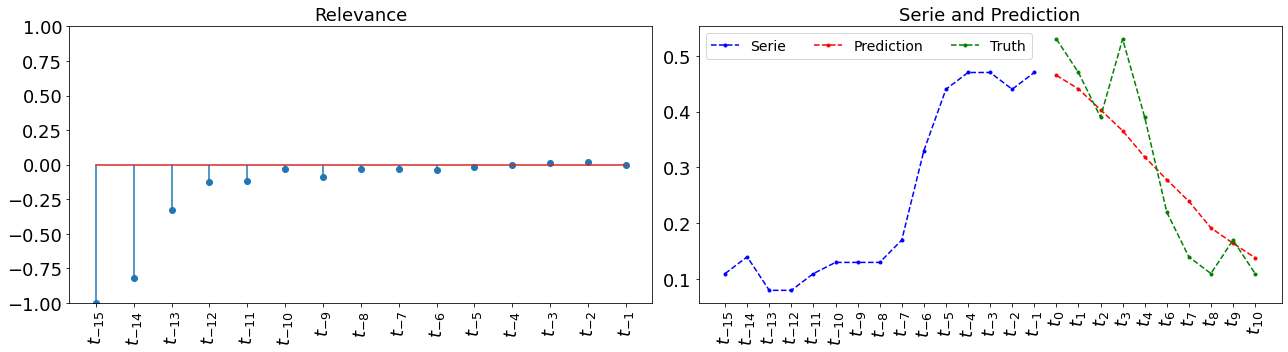

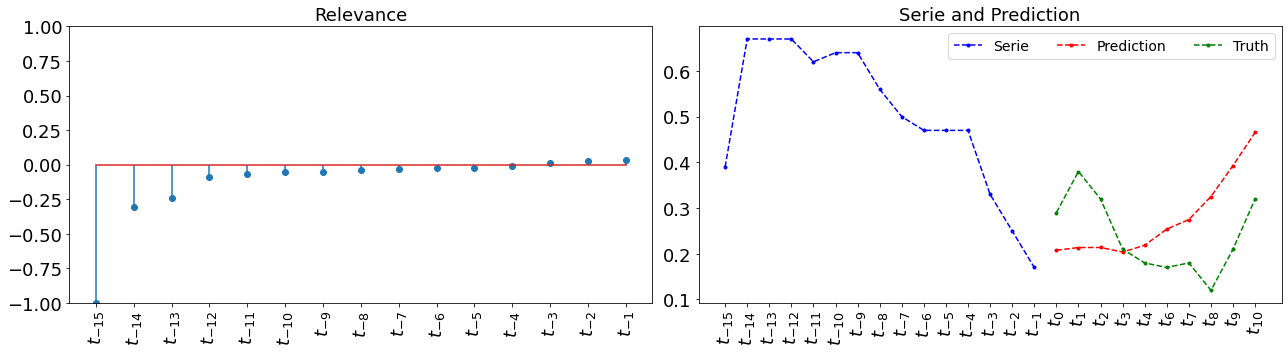

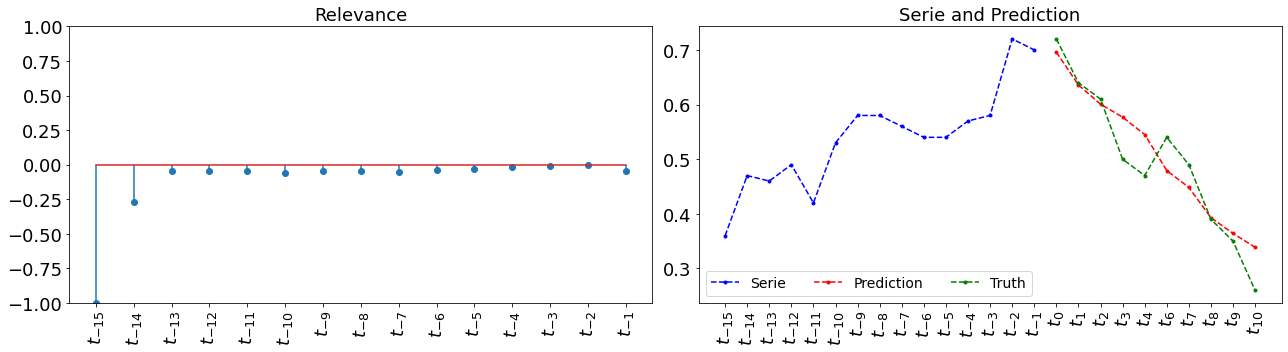

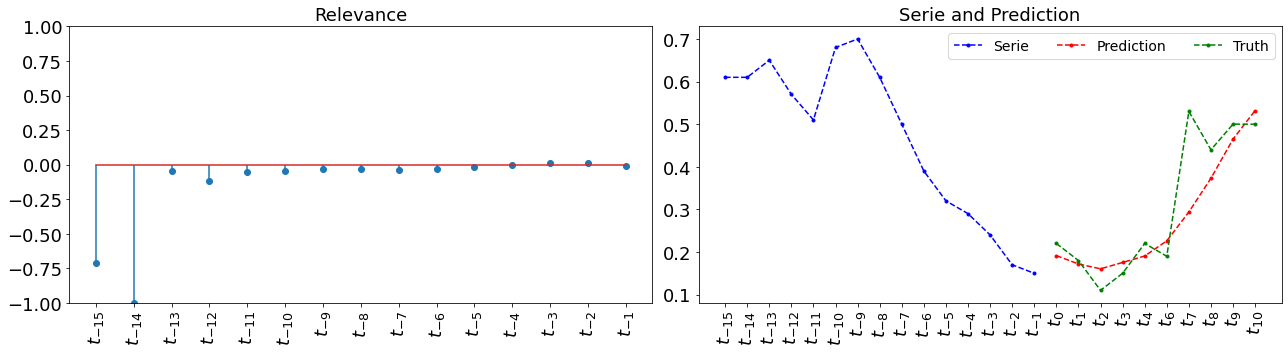

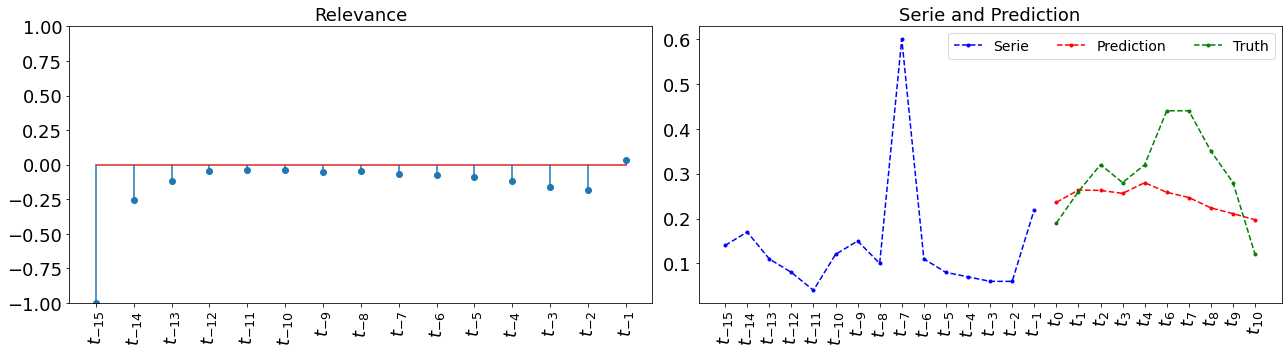

In [ ]:
flag = predictionHorizonMax
x_t = [f'$t_{{{flag-t+1}}}$' if t <= 5 else f'$t_{{{(t-flag)*-1}}}$' for t in range(predictionHorizonMax+window,0,-1)]
time = np.arange(0, predictionHorizonMax+window, 1)

for i,(rel, x_signal, y_t) in enumerate(zip(relevance[15:20], X_test, y_test)):

  prediction = model_GRU.predict(x_signal[None,...])
  norm = -0.5 +  rel/np.max(np.abs(rel)) + 0.5

  plt.figure(figsize=(18,5))
  norm = -0.5 +  rel/np.max(np.abs(rel)) + 0.5
  plt.subplot(1,2,1)
  plt.title('Relevance', fontsize=18)
  plt.stem(norm)
  plt.ylim([-1,1])
  plt.xticks(list(time[0:window]), x_t[0:window], rotation=90, fontsize=18)
  plt.yticks(fontsize=18)

  plt.subplot(1,2,2)
  plt.title('Serie and Prediction', fontsize=18)
  plt.plot(time[0:window], x_signal, '--.b')
  plt.plot(time[window:], np.transpose(prediction), '--.r')
  plt.xticks(list(time), x_t, rotation=90, fontsize=18)
  plt.yticks(fontsize=18)
  plt.plot(time[window:], y_t, '--.g')
  plt.legend(['Serie','Prediction','Truth'], ncol=3, prop={'size': 14})

  plt.tight_layout()

#**LSTM**

In [ ]:
input = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]), name='Input')
lstm_1 = tf.keras.layers.LSTM(neurons, activation='relu', return_sequences=True, name='h1')(input)
lstm_2 = tf.keras.layers.LSTM(neurons, activation='relu', return_sequences=True, name='h2')(lstm_1)
lstm_3 = tf.keras.layers.LSTM(neurons, activation='relu', return_sequences=True, name='h3')(lstm_2)
lstm_4 = tf.keras.layers.LSTM(neurons, activation='relu', return_sequences=True, name='h4')(lstm_3)
lstm_5 = tf.keras.layers.LSTM(neurons, activation='relu', return_sequences=True, name='h5')(lstm_4)
lstm_6 = tf.keras.layers.LSTM(neurons, activation='relu', return_sequences=True, name='h6')(lstm_5)
output = keras.layers.LSTM(predictionHorizonMax)(lstm_6)

# Create model
model_LSTM = tf.keras.Model(inputs=input, outputs=output)


In [ ]:
model_LSTM.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['mae'])
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=1000, batch_size=batch_size, validation_data=(X_valid, y_valid), verbose=0)


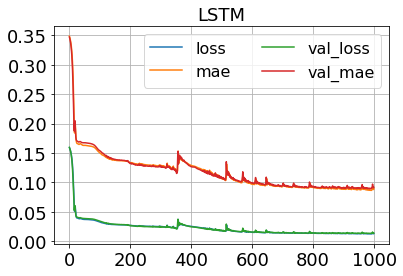

In [ ]:
hpd = pd.DataFrame(history_LSTM.history)

hpd.plot()
plt.grid(True)
plt.legend(ncols=2, prop={'size': 16})
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title('LSTM', fontsize=18)
plt.show()

In [ ]:
forecasting_LSTM = model_LSTM.predict(X_test)

27/27 [==============================] - 2s 22ms/step


In [ ]:
col_names, MSE, RMSE, MAE, R2 = ['Metrics'], ["MSE"], ["RMSE"], ["MAE"], ["R2"]

for k in range(predictionHorizonMax):
  col_names.append(str(k+1))
  MSE.append(round(mean_squared_error(y_test[:,k], forecasting_LSTM[:,k], squared=False), 2))
  RMSE.append(round(mean_squared_error(y_test[:,k], forecasting_LSTM[:,k], squared=True), 2))
  MAE.append(round(mean_absolute_error(y_test[:,k], forecasting_LSTM[:,k]), 2))
  R2.append(round(r2_score(y_test[:,k], forecasting_LSTM[:,k]), 2))

data = [MSE, RMSE, MAE, R2]

print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│ Metrics   │    1 │    2 │    3 │    4 │    5 │    6 │    7 │    8 │    9 │   10 │
╞═══════════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╡
│ MSE       │ 0.08 │ 0.11 │ 0.12 │ 0.13 │ 0.13 │ 0.13 │ 0.13 │ 0.13 │ 0.13 │ 0.12 │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ RMSE      │ 0.01 │ 0.01 │ 0.01 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.02 │ 0.01 │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ MAE       │ 0.06 │ 0.08 │ 0.09 │ 0.1  │ 0.11 │ 0.11 │ 0.1  │ 0.1  │ 0.1  │ 0.1  │
├───────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ R2        │ 0.83 │ 0.7  │ 0.6  │ 0.54 │ 0.51 │ 0.49 │ 0.5  │ 0.53 │ 0.55 │ 0.61 │
╘═══════════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╛


In [ ]:
analyzer = innvestigate.create_analyzer('lrp.z', model_LSTM)
relevance = list(analyzer.analyze(X_test).values())[0]

1/1 [==============================] - 0s 32ms/step


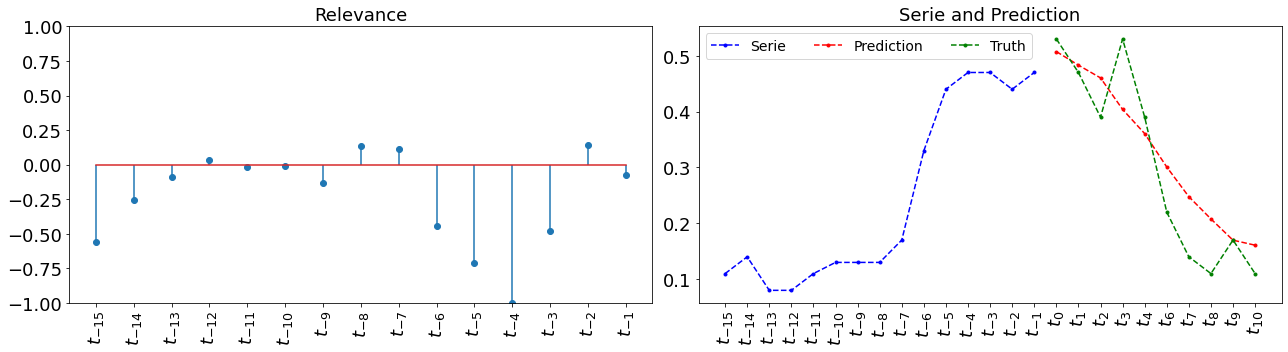

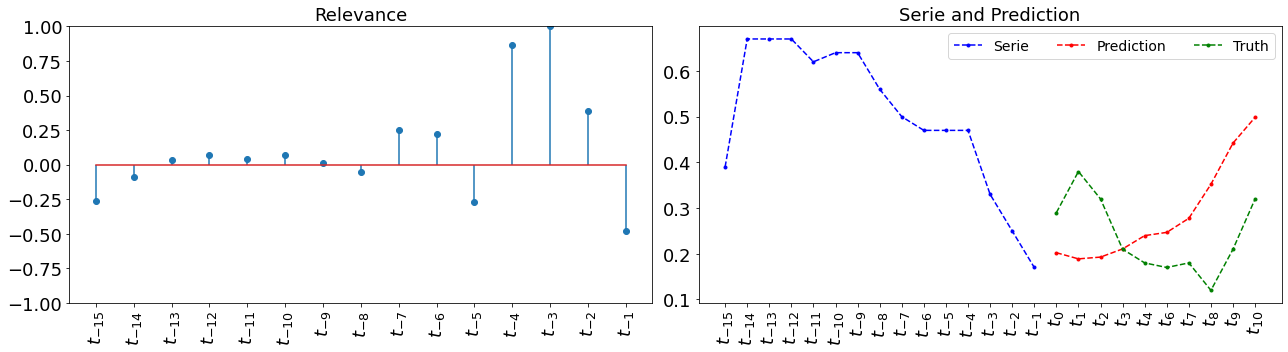

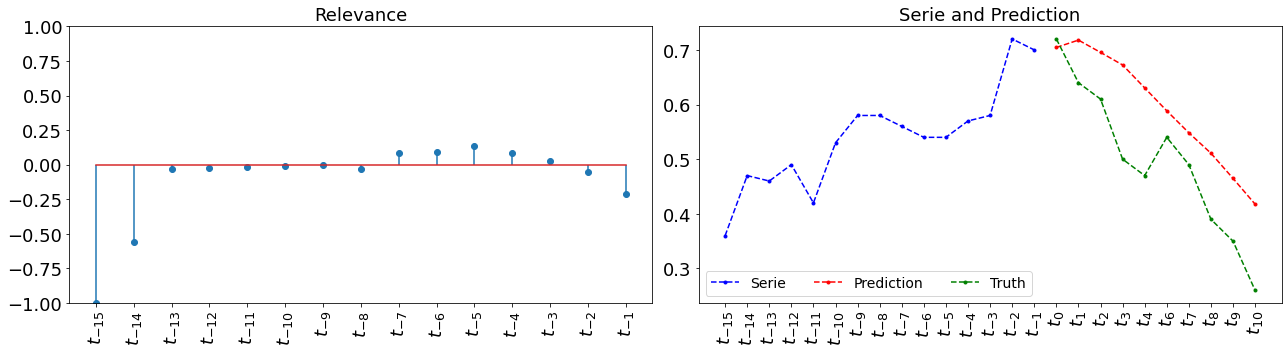

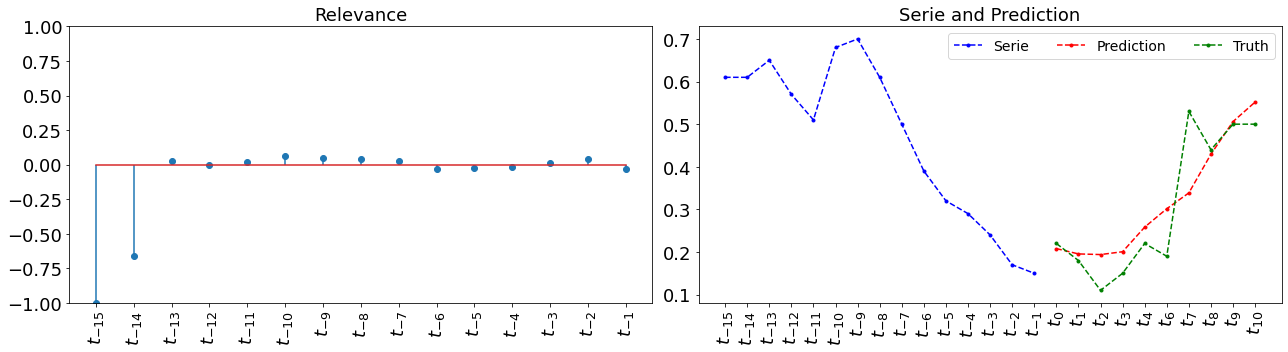

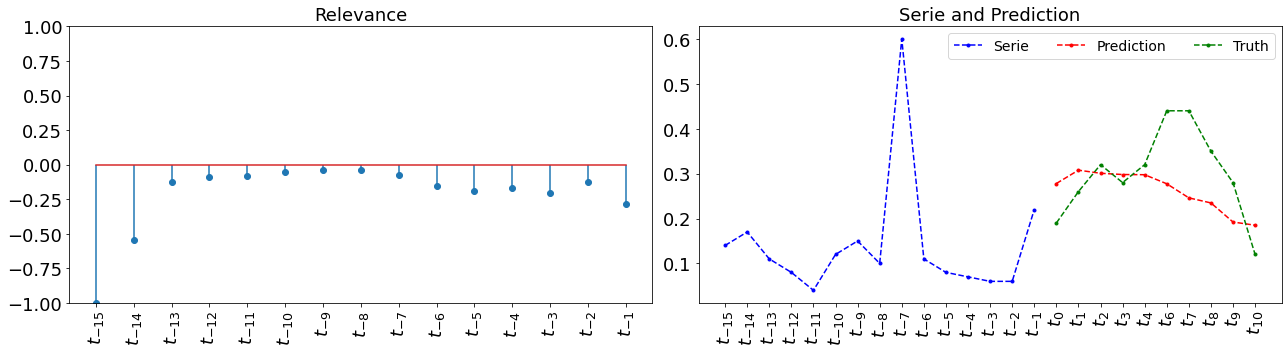

In [ ]:
flag = predictionHorizonMax
x_t = [f'$t_{{{flag-t+1}}}$' if t <= 5 else f'$t_{{{(t-flag)*-1}}}$' for t in range(predictionHorizonMax+window,0,-1)]
time = np.arange(0, predictionHorizonMax+window, 1)

for i,(rel, x_signal, y_t) in enumerate(zip(relevance[15:20], X_test, y_test)):

  prediction = model_LSTM.predict(x_signal[None,...])
  norm = -0.5 +  rel/np.max(np.abs(rel)) + 0.5

  plt.figure(figsize=(18,5))
  norm = -0.5 +  rel/np.max(np.abs(rel)) + 0.5
  plt.subplot(1,2,1)
  plt.title('Relevance', fontsize=18)
  plt.stem(norm)
  plt.ylim([-1,1])
  plt.xticks(list(time[0:window]), x_t[0:window], rotation=90, fontsize=18)
  plt.yticks(fontsize=18)

  plt.subplot(1,2,2)
  plt.title('Serie and Prediction', fontsize=18)
  plt.plot(time[0:window], x_signal, '--.b')
  plt.plot(time[window:], np.transpose(prediction), '--.r')
  plt.xticks(list(time), x_t, rotation=90, fontsize=18)
  plt.yticks(fontsize=18)
  plt.plot(time[window:], y_t, '--.g')
  plt.legend(['Serie','Prediction','Truth'], ncol=3, prop={'size': 14})

  plt.tight_layout()